<h1>TP2 Deep Learning - CNN</h1>

This lab aims at discovering CNNs

* back to MNIST
* first convolutional arhitecture
* filters visualization
* using VGG16, a pretrained model
* filter visualization by maximizing activations
* data augmentation



Authors: Thierry Artières, Stephane Ayache, Ronan Sicre -
Equipe [QARMA](https://qarma.lis-lab.fr/) du [LIS](https://www.lis-lab.fr/)  

---



https://keras.io/api/

Import necessary packages :

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
print(keras.__version__)

3.6.0


<h2> Loading data</h2>

Here we load the MNIST dataset (written digits)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
num_classes = 10
nb_samples = len(x_train)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)# (batch, rows, cols, channel)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)  # shape of a single input
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


MNIST datast contains 60000 exemples spread over 10 classes. We randomly sample few data to fasten the processes.

In [3]:
l_idx = list(range(nb_samples))
np.random.shuffle(l_idx)
l_idx = l_idx[:10000]

x_train, y_train = x_train[l_idx], y_train[l_idx]


We reshape the labels as <i>one-hot vectors</i> of size num_classes. These vectors contain 0 and a single 1 at the index of the corresponding class.

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)


(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)
(10000, 10)


<h3>"Dense" network</h3>

We take a dense model as baseline.
Note the number of parameters and performance.

In [5]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

loss = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[], verbose=1)

score = model.evaluate(x_test, y_test, verbose=0)
print("score=", score)

C:\Users\thorr\PycharmProjects\AI_Resources\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937,482 (3.58 MB)

 Trainable params: 937,482 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6850 - loss: 1.0034 - val_accuracy: 0.9230 - val_loss: 0.2388
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9122 - loss: 0.2982 - val_accuracy: 0.9370 - val_loss: 0.1741
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 0.2191 - val_accuracy: 0.9570 - val_loss: 0.1407
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9529 - loss: 0.1493 - val_accuracy: 0.9630 - val_loss: 0.1174
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9682 - loss: 0.1071 - val_accuracy: 0.9630 - val_loss: 0.1034
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.0974 - val_accuracy: 0.9750 - val_loss: 0.0852
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.0809 - val_accuracy: 0.9600 - val_loss: 0.1081
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0615 - val_accuracy: 0.9710 - val_

<h3>First convolutional architecture</h3>

We replace all dense layers but the last one by convolutional ones. The Conv2D layers are followed by max pooling: MaxPooling2D. We do not flatten the input data as we use 2D inputs, but the last Dense layer expect a 1D input thus we use the flatten there.

In [18]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model2.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,634 (916.54 KB)

 Trainable params: 234,634 (916.54 KB)

 Non-trainable params: 0 (0.00 B)

None


<b>TO DO :</b> Explain the number of parameters of each layer

<h4>Entrainement du réseau :</h4>

Call the "fit" function to train our model. Then evaluate it. You can visualize the training curves.

In [19]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, callbacks=[], verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)

Epoch 1/20
41/71 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4882 - loss: 1.6328

KeyboardInterrupt: 

<b>TO DO :</b> play with the architecture

Vary the number of layers

reduce the number of filters

remove max pooling and change the stride to 2

Observe performance changes.

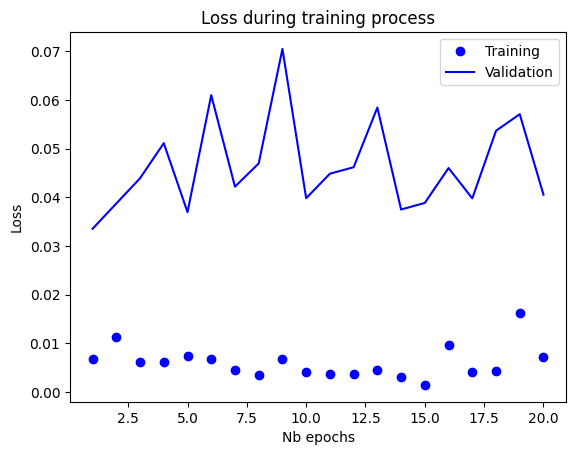

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()


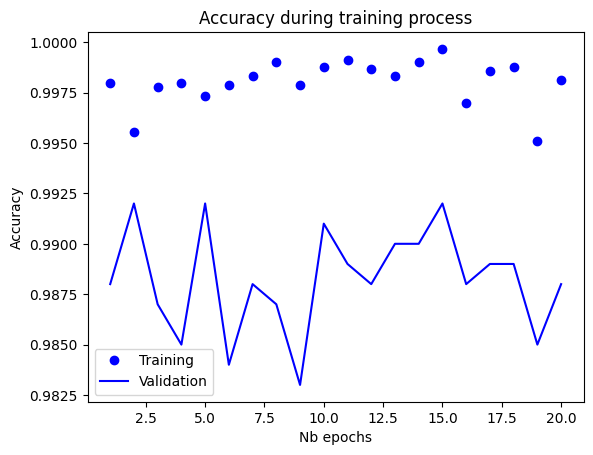

In [15]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 21)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()

<h1>Autoencoder</h1>


* See the following examples coming from: https://blog.keras.io/building-autoencoders-in-keras.html

In [20]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K

encoded_dim = 128

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Flatten()(x)
encoded = Dense(encoded_dim)(x)
x = Dense(128)(encoded)
x = Reshape((4,4,8))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

encoder = Model(input_img, encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(encoder.summary())
print(autoencoder.summary())




Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,416 (71.94 KB)

 Trainable params: 18,416 (71.94 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,409 (146.13 KB)

 Trainable params: 37,409 (146.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1448 - val_loss: 0.0690
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0643 - val_loss: 0.0475
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0439 - val_loss: 0.0358
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0352 - val_loss: 0.0329
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0311 - val_loss: 0.0285
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0282 - val_loss: 0.0263
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0262 - val_loss: 0.0252
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0248 - val_loss: 0.0234
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0234 - val_loss: 0.0230
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0224 - val_loss: 0.0217


<b>TO DO :</b>

Explain the architecture, particularly the decoder.

Display an input image and its reconstruction.

modify the architecture to project dat into a 2 dimensional latent space.

Display an input image and its reconstruction again.

Plot a part of the dataset in 2D



In [22]:
from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
from keras import backend as K
%matplotlib inline

label :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


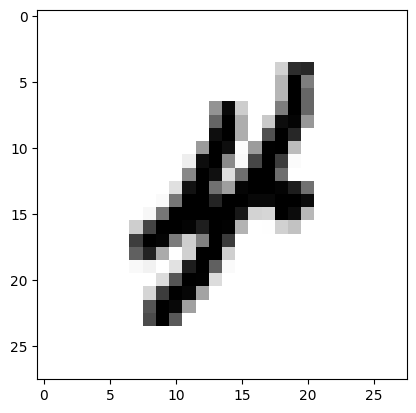

In [23]:
i = 2

pl.imshow(x_train[i, :,: ,0], interpolation='nearest', cmap=cm.binary)
print("label : ", y_train[i,:])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
label :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


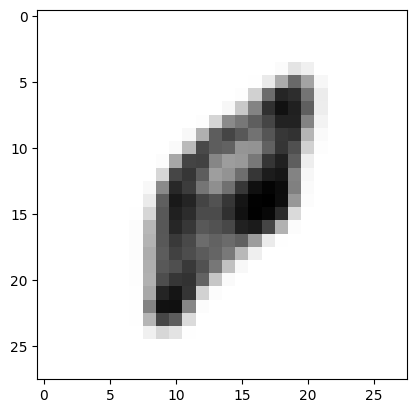

In [24]:
activations = encoder.predict(x_train)
reconstructions = autoencoder.predict(x_train)

i = 2

pl.imshow(reconstructions[i, :,: ,0], interpolation='nearest', cmap=cm.binary)

print("label : ", y_train[i,:])

<h1>Filters Visualization</h1>

a filter activation or featume map of a convolutional layer corresponds to the output of such layer. Their content depends on the input of the network.

A layer defined with 64 conv. filters , generate 64 maps

We use matplotlib to display an array of images


In [25]:
import matplotlib.pyplot as plt
def show_images(images, cols = 1):

    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, int(np.ceil(n_images/float(cols))), n + 1)
        plt.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)


A simple method to obtain these maps is with Keras  is to foward an image (with the proper size) to a truncated model.
We cut the model where we want to obtain the feature maps.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
-0.0 0.63534415 (1, 28, 28, 64)


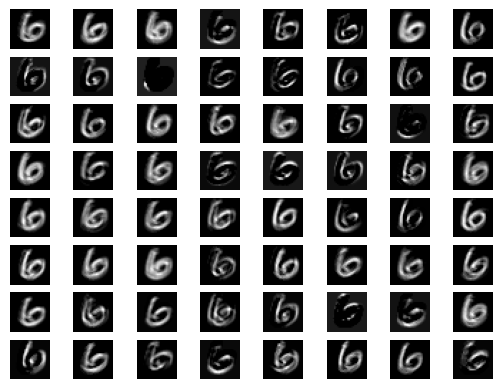

In [26]:
from keras.models import Model

# Définition d'un modèle via la "graph" API de Keras
model_tmp = Model(model2.layers[0].input, model2.layers[0].output)

# Cartes réponses de x_test[10] (un '0')
feature_maps = model_tmp.predict(np.expand_dims(x_test[11], 0))

# normalisation des valeurs entre 0 et 1
minimum, maximum = np.min(feature_maps), np.max(feature_maps)
feature_maps = (feature_maps - minimum) / (maximum - minimum)

print(minimum, maximum, feature_maps.shape)

from PIL import Image
from IPython.display import display

images = []
for i in range(64):
  images.append(np.array(255*feature_maps[:,:,:,i]).reshape(28,28).astype('uint8'))

show_images(images,8)

The images obtained are from the filter in first layer and show that these filters learned on the first layer detect orientations and contours.



<h4> Filters visualization</h4>

Visualizing filters from the first layer is simple because filters have as many channels as the input, so filters are on the same domain as data.



In [27]:
# Récupère tous les paramètres appris par le réseau
weights = model2.get_weights()

for w in weights: print(w.shape)

(5, 5, 1, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(1152, 10)
(10,)


<b> TO DO : </b> what do the 2 previous lines do ?

Display the filters of the first conv. layer.


-0.09295713 0.09099532


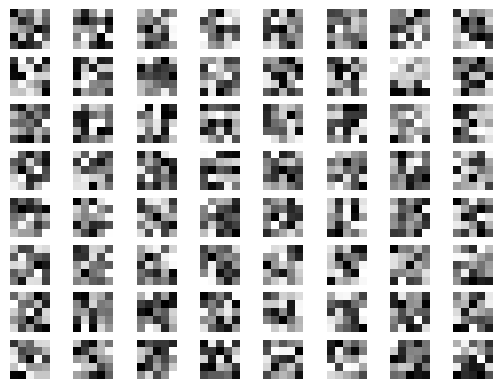

In [28]:
# normalize values between 0 and 1
minimum, maximum = np.min(weights[0]), np.max(weights[0])
weights0 = (weights[0] - minimum) / (maximum - minimum)

print(minimum, maximum)
# entre 0 et 255 pour l'affichage
weights0 *= 255.

images = []
for i in range(64):
  images.append(np.array(255*weights0[:,:,:,i]).reshape(5,5).astype('uint8'))

show_images(images, 8)

<h3> CNN for natural images </h3>

let's look at a deeper model for natural image classification (VGG16 pre-trained on ImageNet).


In [30]:
!wget https://pageperso.lis-lab.fr/stephane.ayache/cat.jpg
!wget https://pageperso.lis-lab.fr/stephane.ayache/imagenet_class_index.json

from keras.applications.vgg16 import VGG16
#from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.utils import load_img
import json

# Récupération du modèle complet VGG16
model3 = VGG16(include_top=True, weights='imagenet')
#print(model3.summary())

# chargement d'un dictionnaire qui met en correspondant l'index d'une classe ImageNet et son nom
with open('imagenet_class_index.json') as f:
    CLASS_INDEX = json.load(f)

# chargement et preprocess de l'image (dont normalisation et redimensionnement)
img_path = 'cat.jpg'
img = load_img(img_path, target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# prédiction et affichage de la classe de probabilité maximale
softmax_output = model3.predict(x)
best_class = np.argmax(softmax_output)
im_class = CLASS_INDEX[str(best_class)][1]
print("prediction: ", im_class)

FileNotFoundError: [Errno 2] No such file or directory: 'imagenet_class_index.json'

In [31]:
from IPython.display import Image
Image('cat.jpg')

FileNotFoundError: No such file or directory: 'cat.jpg'

FileNotFoundError: No such file or directory: 'cat.jpg'

<IPython.core.display.Image object>

Is our kitten recognized as a cat ?
Let's look at filters from the first layer.


-0.67140007 0.6085159


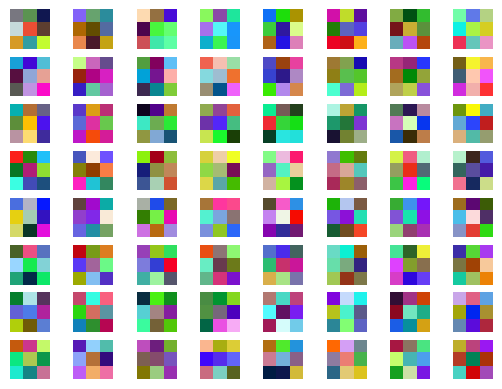

In [32]:
weights = model3.get_weights()
#for w in weights: print(w.shape)

# normalize values between 0 and 1
minimum, maximum = np.min(weights[0]), np.max(weights[0])
weights0 = (weights[0] - minimum) / (maximum - minimum)

print(minimum, maximum)
# entre 0 et 255 pour l'affichage
weights0 *= 255.

images = []
for i in range(64):
  images.append(np.array(255*weights0[:,:,:,i]).reshape(3,3,3).astype('uint8'))

show_images(images, 8)


Note that we disply filters in RGB and we could separate channels.
In any case this is not very informative.

Now we are going to generate an image that maximizes a given filter.

<h3> Visualization by maximization of activation</h3>
  
Tensorflow functions (Keras nbackend) allows us to define a function from an image to the activation of a given layer.
Maximizing this function through its gradient means that we built an artificial image to maximize a specific filter, thus building a pattern that maximizes this filter.

here are some useful functions

In [33]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x = np.array(x, dtype=np.float64)

    x -= x.mean()
    x /= (x.std() + 1e-5) # K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255

    return x.astype(np.uint8)

Defintion of a Keras function, geting the gradient, perform gradient ascen to maximize.


In [34]:
print(model3.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Choisir une couche et numéro de filtre à visualiser
num_layer = 18 #18
num_filter = 20 #12

# Définit un submodel de l'entrée vers la couche visée
submodel = tf.keras.models.Model([model3.inputs[0]], [model3.layers[num_layer].output])

# Initialise une image aléatoire et cast en variable tf.float32
input_img_data = np.random.random((1, 224, 224, 3))
input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

# Iterate gradient ascents
epochs = 500
step_size = 10.
for i in range(epochs):
    with tf.GradientTape() as tape:
        outputs = submodel(input_img_data)
        loss_value = tf.reduce_mean(outputs[:, :, :, num_filter])
    grads = tape.gradient(loss_value, input_img_data) # gradient of loss wrt inputs
    normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
    input_img_data.assign_add(normalized_grads * step_size)

# Affichage de l'image obtenue
print(loss_value.numpy())
img = deprocess_image(input_img_data)
show_images(img)

C:\Users\thorr\PycharmProjects\AI_Resources\.venv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_201']. Received: the structure of inputs=*
  warnings.warn(


<b> TODO : </b> vary the layers and filters and comment on your results. How can one get more complex figures ?

<h1> Training a deep network: augmentation</h1>

A deeper network like VGG has billions of parameters and can be complicated to train. Parameters must fit in the GPU RAM, as well as all the batch data.
On ImageNet image resolution is 255x255x3.

Moreover, one may not have a large data collection to learn from. Thus, there are several options:
- start from a pre-trained networks and fine-tune it.
- regularize the network weights (helpful, but not enough)
- artificially augment the number of data (often helpful).

Here we focus on data augmentation on MNIST.


In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
num_classes = 10
nb_samples = len(x_train)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Sélection aléatoire de 500/1000 exemples
l_idx = list(range(nb_samples))
np.random.shuffle(l_idx)
l_idx = l_idx[:1000]
x_train, y_train = x_train[l_idx], y_train[l_idx]

# conversion des étiquettes au format one-hot vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Architecture du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#print(model2.summary())

model2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)

Performance can be improved by augmentation. Here we generate 20k data from 5k.



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# déclaration d'un générateur, qui transformera "à la volée" des données MNIST
datagen = ImageDataGenerator(
    #featurewise_center=False,
    #featurewise_std_normalization=False,
    rotation_range=10,
    zoom_range = 0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False, # flip horizontal et vertical n'ont pas de sens pour des digits !
    vertical_flip=False
    )
datagen.fit(x_train)

# On instancie le générateur
flow = datagen.flow(x_train, y_train, batch_size=128, shuffle=True)

# Pour affichage : une itération du générateur
xx = next(flow)
print(xx[0].shape, xx[1].shape)

images = []
for i in range(64):
  images.append(np.array(255*xx[0][i,:,:,:]).reshape(28,28).astype('uint8'))
show_images(images, 8)


# réinitialisation du modèle
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entrainement avec les données augmentées (à la volée)
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128), steps_per_epoch=int(1000/128), epochs=20)

# évaluation
score = model2.evaluate(x_test, y_test, verbose=0)
print("score=", score)


<b>TO DO : </b> test other types and quantities of augmentations and see the impact on the network precision.

<b>TO DO : </b> modify the architecture for image classification on CIFAR 10 dataset.